In [11]:
import json
import pandas as pd
import numpy as np
import datetime
import time
import requests as rq
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

url = "https://min-api.cryptocompare.com/data/histoday"

parameters = {"fsym":"BTC","tsym":"USD","limit":"196"}

btc_json = rq.get(url, params=parameters).json()

btc_price=[]
delta_price=[]
btc_volume=[]
btc_timestamp=[]
btc_date=[]


# pprint(btc_json)

for data in btc_json['Data']:
    btc_price.append(data['close'])
    btc_volume.append(data['volumefrom'])
   #date = datetime.datetime.fromtimestamp(data['time']).isoformat()
    date = datetime.datetime.fromtimestamp(int(data['time'])).strftime('%Y-%m-%d')
    btc_date.append(date)
    btc_timestamp.append(data['time'])

x_axis = btc_date
y_axis = btc_price

df = pd.DataFrame({"Date":btc_date, "price":btc_price, "volume":btc_volume})
df['delta_price'] = df['price'].diff(1)
df['Abs_delta_price'] = df['delta_price'].abs()
df.head()

,Date,price,volume,delta_price,Abs_delta_price
0,2017-09-19,3882.16,86645.15,NaN,NaN
1,2017-09-20,3617.27,145124.78,-264.89,264.89
2,2017-09-21,3600.83,114717.36,-16.44,16.44
3,2017-09-22,3788.02,67820.32,187.19,187.19
4,2017-09-23,3667.52,49661.76,-120.50,120.50


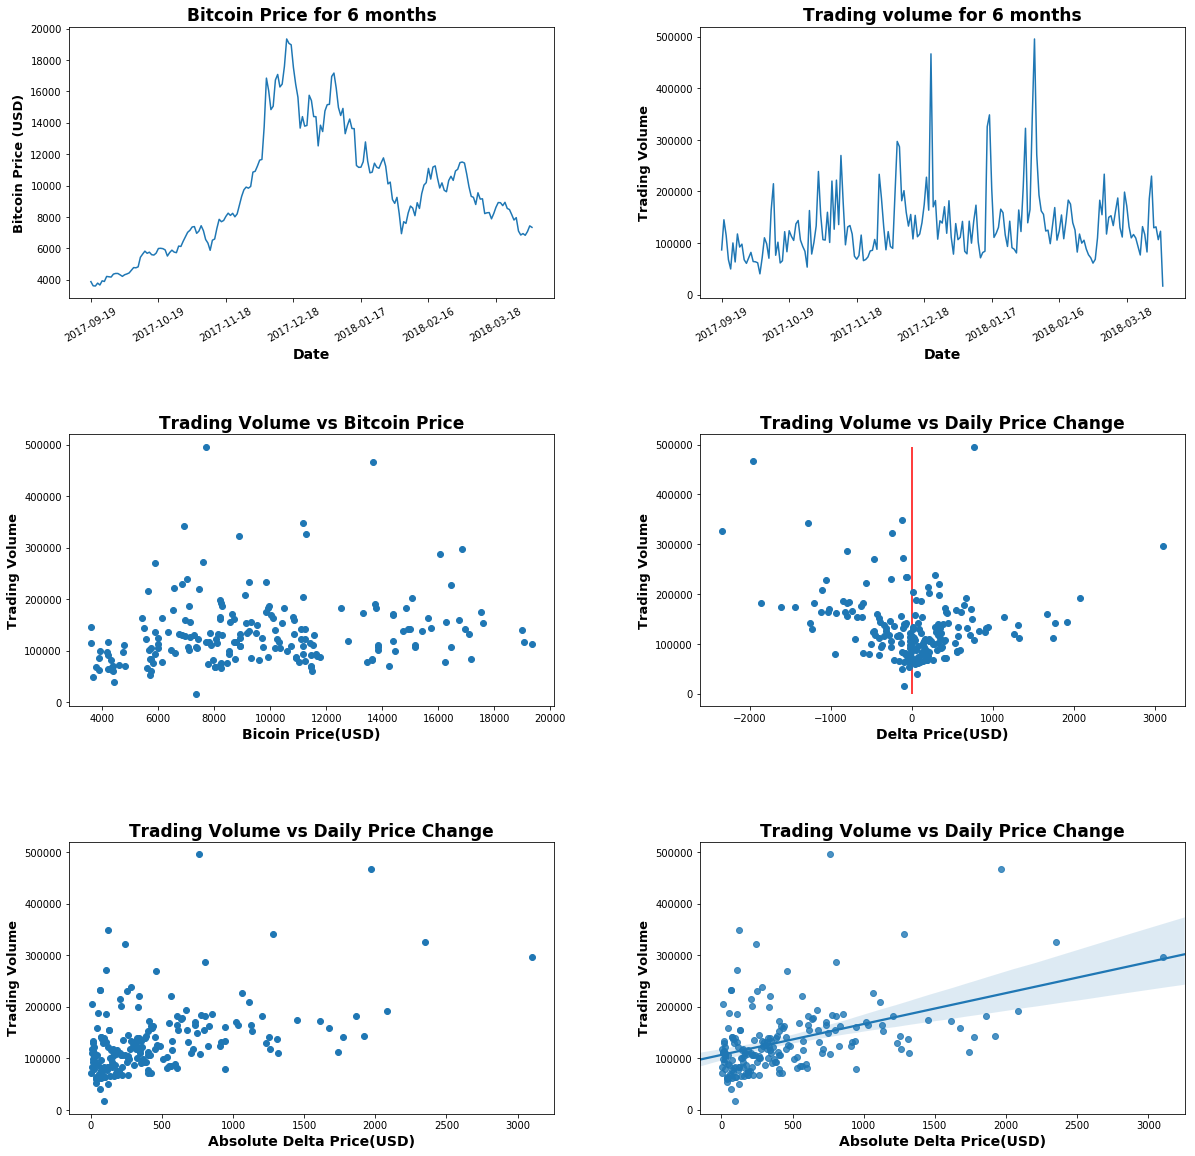

In [13]:
# Export file as a CSV, without the Pandas index, but with the header
df.to_csv("Bitcoin_Price&Volume.csv", index=False, header=True)

fig = plt.figure(figsize=(20, 20)) 

plt.subplot(3,2,1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
plt.plot(x_axis, y_axis)
plt.title("Bitcoin Price for 6 months", fontsize=17, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Bitcoin Price (USD)', fontsize=13, fontweight='bold')
plt.xticks(np.arange(0,181,  step = 30), [btc_date[i] for i in np.arange(0,181,  step = 30)], rotation=30)

plt.subplot(3,2,2)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
plt.plot(x_axis, btc_volume)
plt.title("Trading volume for 6 months", fontsize=17, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Trading Volume', fontsize=13, fontweight='bold')
plt.xticks(np.arange(0,181,  step = 30), [btc_date[i] for i in np.arange(0,181,  step = 30)], rotation=30)

plt.subplot(3,2,3)

plt.plot(btc_price, btc_volume, linewidth=0, marker='o')
plt.title("Trading Volume vs Bitcoin Price", fontsize=17, fontweight='bold')
plt.xlabel('Bicoin Price(USD)', fontsize=14, fontweight='bold')
plt.ylabel('Trading Volume', fontsize=13, fontweight='bold')

plt.subplot(3,2,4)
vert_line = 0
plt.vlines(x=vert_line, ymin=0, ymax=max(df['volume']), color='red', zorder=2)
plt.plot(df['delta_price'], df['volume'],linewidth=0, marker='o')
plt.title("Trading Volume vs Daily Price Change", fontsize=17, fontweight='bold')
plt.xlabel('Delta Price(USD)', fontsize=14, fontweight='bold')
plt.ylabel('Trading Volume', fontsize=13, fontweight='bold')

plt.subplot(3,2,5)
plt.plot(df['Abs_delta_price'], df['volume'],linewidth=0, marker='o')
plt.title("Trading Volume vs Daily Price Change", fontsize=17, fontweight='bold')
plt.xlabel('Absolute Delta Price(USD)', fontsize=14, fontweight='bold')
plt.ylabel('Trading Volume', fontsize=13, fontweight='bold')

plt.subplot(3,2,6)
sns.regplot(x='Abs_delta_price', y='volume', data=df)
plt.title("Trading Volume vs Daily Price Change", fontsize=17, fontweight='bold')
plt.xlabel('Absolute Delta Price(USD)', fontsize=14, fontweight='bold')
plt.ylabel('Trading Volume', fontsize=13, fontweight='bold')

plt.show()

plt.savefig("BitcoinAnalysis.png")